<a href="https://colab.research.google.com/github/PosgradoMNA/Atividades-de-aprendizaje-SamaraGarcia/blob/Actividad4_Equipo15/Equipo15_Actividad_Semanal4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Actividad Semanal -- 4**

---



*   Ciencia y analítica de datos
*   Fecha de entrega: 11 de Octubre del 2022
*   Alumnos:              
    1.   David Winterman A00919441
    2.   Samara García González A01273001











**Parte 1**

---





*   **Paso 1:**Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales. 
*   **Paso 2:**Interprete cada componente principal en términos de las variables originales

Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

* **Paso 3:** Identifique valores atípicos

Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

In [ ]:
#Normalización
#Importando las librerias
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [ ]:
inPath = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv '

In [ ]:
#Leyendo las bases de datos y eliminado la primer columna porque ese es el index
df = pd.read_csv(inPath, index_col = 0)
df.index.name = None
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


**Significado de las columnas**
* X1: Amount of the given credit 
* X2: Gender (1 = male; 2 = female). 
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
* X4: Marital status (1 = married; 2 = single; 3 = others). 
* X5: Age (year). 
* X6 - X11: History of past payment.
* X12-X17: Amount of bill statement X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
* X18-X23: Amount of previous payment  X18 
= amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 


**Paso 0: Normalización min-max**

---



In [ ]:
#Definiendo la función normalize para probar normalizacion entre 0 y 1 de una sola columna
df.iloc[:, 3:].head()

,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [ ]:
#Haciendo una copia del dataframe para poder comparar antes y después
ndf = df.copy()
ndf.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [ ]:
#Obteniendo el nombre de las columnas 
ndf.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [ ]:
#Aplicando la normalizacion entre 0 y 1 (min, max) a todo el data frame e impirmiendo las primeras 5 filas
pcs = PCA()
pcs.fit(preprocessing.scale(df.iloc[:, 3:].dropna(axis=0))) 
                # Standardize a dataset along any axis.
                # Center to the mean and component wise scale to unit variance.

PCA()

**Paso 1:Transformación de datos**

---
PCA es un método de reducción de datos ,pensado para usarse con grandes cantidades de variables, sobre todo de variables numéricas.


In [ ]:

pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Standard deviation,2.554281,1.957491,1.230657,1.182589,0.974661,0.950674,0.941711,0.933903,0.884892,0.855757,...,0.764369,0.631154,0.510101,0.500052,0.434564,0.363222,0.264952,0.202255,0.159034,0.152406
Proportion of variance,0.310673,0.182459,0.072117,0.066594,0.045235,0.043036,0.042228,0.041531,0.037286,0.034871,...,0.027821,0.018969,0.012390,0.011907,0.008992,0.006282,0.003343,0.001948,0.001204,0.001106
Cumulative proportion,0.310673,0.493132,0.565250,0.631844,0.677078,0.720114,0.762342,0.803873,0.841159,0.876030,...,0.933859,0.952827,0.965218,0.977124,0.986117,0.992399,0.995742,0.997690,0.998894,1.000000


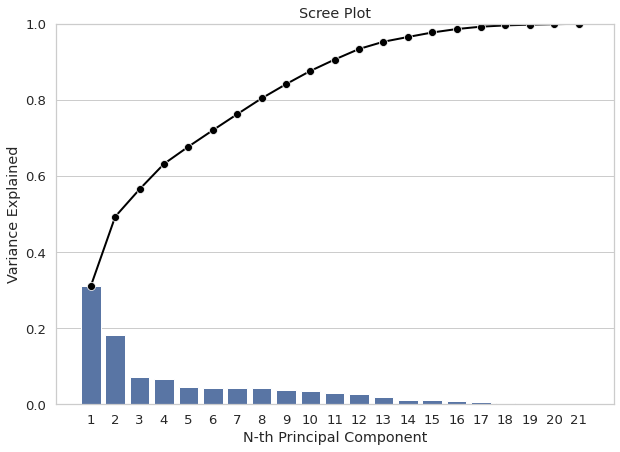

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()


**Paso 2:Interpretar componentes**

---

In [ ]:
#Los primeros 10 componentes representan el 93% de la varianza total
((pcsSummary_df.iloc[2][11])*100).round(0)
#type(pcsSummary_df)

93.0

In [ ]:
#Los primeros 8 componentes representan el 93% de la varianza total
((pcsSummary_df.iloc[2][10])*100).round(0)
#type(pcsSummary_df)

91.0

In [ ]:
#Los primeros 7 componentes representan el 84% de la varianza total
((pcsSummary_df.iloc[2][8])*100).round(0)
#type(pcsSummary_df)

84.0

In [ ]:
#Los primeros 2 componentes representan casi el 49% de la varianza total
((pcsSummary_df.iloc[2][1])*100).round(2)

49.31

In [ ]:
#El primer componente solo representa casi el 31% d ela varianza total
((pcsSummary_df.iloc[2][0])*100).round(2)

31.07

In [ ]:
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
Standard deviation,2.5543,1.9575,1.2307,1.1826,0.9747,0.9507,0.9417,0.9339,0.8849,0.8558,...,0.7644,0.6312,0.5101,0.5001,0.4346,0.3632,0.2650,0.2023,0.1590,0.1524
Proportion of variance,0.3107,0.1825,0.0721,0.0666,0.0452,0.0430,0.0422,0.0415,0.0373,0.0349,...,0.0278,0.0190,0.0124,0.0119,0.0090,0.0063,0.0033,0.0019,0.0012,0.0011
Cumulative proportion,0.3107,0.4931,0.5652,0.6318,0.6771,0.7201,0.7623,0.8039,0.8412,0.8760,...,0.9339,0.9528,0.9652,0.9771,0.9861,0.9924,0.9957,0.9977,0.9989,1.0000


In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df.iloc[:, 3:].columns
                                )
pcsComponents_df.iloc[:,:9]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
X4,-0.003337,-0.039156,0.203855,-0.672925,0.079728,0.044079,-0.020452,0.010861,0.019423
X5,0.010532,0.065595,-0.199232,0.666185,-0.072655,-0.045414,0.010592,0.009467,0.029799
X6,0.172142,-0.305431,-0.019324,0.037235,0.261237,0.069579,-0.043959,-0.003788,-0.019685
X7,0.205673,-0.336779,0.030314,0.034596,0.098627,-0.051286,0.000004,-0.023582,-0.003202
X8,0.211787,-0.345706,0.084954,0.038530,-0.043903,-0.073833,-0.005317,-0.020846,-0.023344
X9,0.218361,-0.346745,0.120403,0.045350,-0.154812,-0.091254,-0.005959,0.017987,-0.046729
X10,0.221772,-0.333154,0.140803,0.042274,-0.205852,-0.057536,0.027711,0.021416,0.081382
X11,0.216461,-0.305692,0.140546,0.039981,-0.208244,-0.027049,0.112266,-0.032133,0.030208
X12,0.329807,0.167200,-0.207432,-0.075022,0.042420,-0.039367,-0.028602,-0.058661,0.010273
X13,0.341365,0.169110,-0.176935,-0.068405,-0.000488,0.005638,-0.082783,-0.043750,-0.036729


In [ ]:
pcsComponents_df.PC1.idxmax()

'X15'

In [ ]:
pcsComponents_df.PC1.nlargest(3)

X15    0.349351
X16    0.347295
X14    0.345230
Name: PC1, dtype: float64

In [ ]:
pcsComponents_df.PC2.idxmin()

'X9'

**Paso 3: Gráfica de valores atípicos BoxPlot**

---

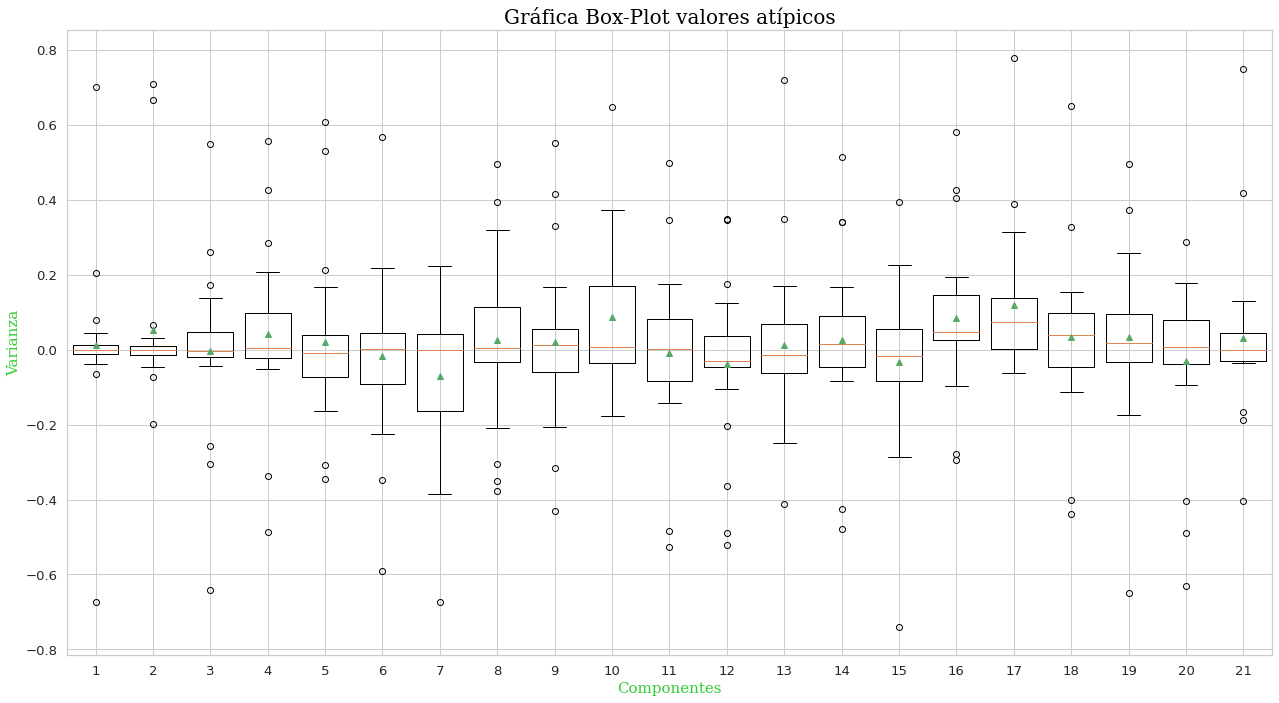

In [129]:
# Box Plot
plt.rcParams["figure.figsize"] = [18, 10]
plt.rcParams["figure.autolayout"] = True
plt.boxplot(pcsComponents_df, showmeans=True, widths=(0.8))

font1 = {'family':'serif','color':'black','size':20}
font2 = {'family':'serif','color':'limegreen','size':15}


plt.title("Gráfica Box-Plot valores atípicos",fontdict = font1)

plt.xlabel("Componentes",fontdict = font2)
plt.ylabel("Varianza",fontdict = font2)

plt.show()

**Parte 2**

---



**Responde las siguientes preguntas:**

1.  ¿Cuál es el número de componentes mínimo y por qué?
2.  ¿Cuál es la variación de los datos que representan esos componentes?
3.  ¿Cuál es la pérdida de información después de realizar PCA?
4.  De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?
